<a href="https://colab.research.google.com/github/httr1s0/programmingSchoolJobHuntingMachineLearningModelForPortfolio/blob/main/ProgrammingSchoolJobHuntingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.データ読み込み**

## （１） 事前処理

In [1]:
# グーグルドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

# 日本語化
!pip install japanize-matplotlib | tail -n 1

# 事前処理
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import japanize_matplotlib

from IPython.display import display

np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option("display.max_columns",None)
plt.rcParams["font.size"] = 14

Mounted at /content/drive


## （２）データ読み込み

In [2]:
# データ取得・カラム名決定
import csv
csvfile = open('/content/drive/My Drive/programmingSchoolJobHantingRecordForPortfolioPastData.csv', 'r', encoding='utf-8')

df = pd.read_csv(csvfile)

columns = ['年齢','性別','最終学歴','正社員歴','就業状況','ポートフォリオ有無','マネジメント経験','難関大卒','PF高クオリティ','有名企業在籍経験','中退歴','既往歴','短期離職経験','面談実施回数','希望年収','希望職種','希望業種','希望エリア','就活開始日','就活開始日（年）','就活開始日（月）','就活開始日（日）','応募数','１次面接実施数','２次面接以降実施数','内定数','内定承諾日','内定承諾日（年）','内定承諾日（月）','内定承諾日（日）','就職活動日数','書類選考通過率','内定獲得率']
df.columns = columns

# **2.データ確認**

## （１）データフレーム内容表示

In [3]:
display(df.head())
display(df.tail())
print(df.shape)

,年齢,性別,最終学歴,正社員歴,就業状況,ポートフォリオ有無,マネジメント経験,難関大卒,PF高クオリティ,有名企業在籍経験,中退歴,既往歴,短期離職経験,面談実施回数,希望年収,希望職種,希望業種,希望エリア,就活開始日,就活開始日（年）,就活開始日（月）,就活開始日（日）,応募数,１次面接実施数,２次面接以降実施数,内定数,内定承諾日,内定承諾日（年）,内定承諾日（月）,内定承諾日（日）,就職活動日数,書類選考通過率,内定獲得率
0,28,男,大卒,2,在職中,有,無,無,無,無,無,無,無,6,〜350万円,バックエンドエンジニア,受託開発企業,東京のみ,2019-01-07,2019,1,7,101,42,9,2,2019-04-06,2019,4,6,89,0.4158,0.0198
1,33,男,大卒,2,在職中,無,有,有,無,無,無,無,無,3,〜350万円,フロントエンドエンジニア,受託開発企業,東京・大阪,2019-01-07,2019,1,7,85,13,6,4,2019-03-28,2019,3,28,80,0.1529,0.0471
2,27,男,高卒,3,離職中,有,無,無,無,無,無,無,無,13,〜350万円,フロントエンドエンジニア,受託開発企業,東京のみ,2019-01-07,2019,1,7,150,29,5,2,2019-04-14,2019,4,14,97,0.1933,0.0133
3,27,男,短大卒・専門卒,2,在職中,無,無,無,無,無,無,無,無,9,〜300万円,フロントエンドエンジニア,自社開発企業,東京のみ,2019-01-07,2019,1,7,66,16,4,1,2019-05-13,2019,5,13,126,0.2424,0.0152
4,31,男,大卒,3,離職中,有,有,無,無,無,無,無,無,3,〜350万円,フロントエンドエンジニア,受託開発企業,大阪のみ,2019-01-07,2019,1,7,73,27,8,3,2019-03-01,2019,3,1,53,0.3699,0.0411


,年齢,性別,最終学歴,正社員歴,就業状況,ポートフォリオ有無,マネジメント経験,難関大卒,PF高クオリティ,有名企業在籍経験,中退歴,既往歴,短期離職経験,面談実施回数,希望年収,希望職種,希望業種,希望エリア,就活開始日,就活開始日（年）,就活開始日（月）,就活開始日（日）,応募数,１次面接実施数,２次面接以降実施数,内定数,内定承諾日,内定承諾日（年）,内定承諾日（月）,内定承諾日（日）,就職活動日数,書類選考通過率,内定獲得率
4401,29,男,大卒,3,在職中,有,有,無,無,無,無,無,無,7,〜300万円,希望なし・その他,受託開発企業,東京のみ,2021-01-18,2021,1,18,106,22,11,2,2021-04-26,2021,4,26,98,0.2075,0.0189
4402,31,女,大卒,2,離職中,無,無,有,無,無,無,無,無,6,〜300万円,フロントエンドエンジニア,希望なし・その他,東京・大阪,2021-01-18,2021,1,18,108,43,5,2,2021-04-24,2021,4,24,96,0.3981,0.0185
4403,28,男,高卒,1,在職中,有,有,無,無,有,無,無,無,13,〜300万円,希望なし・その他,受託開発企業,東京・大阪,2021-01-18,2021,1,18,57,44,9,3,2021-04-24,2021,4,24,96,0.7719,0.0526
4404,27,男,短大卒・専門卒,0,離職中,有,無,無,無,無,無,無,無,13,〜350万円,フロントエンドエンジニア,受託開発企業,東京のみ,2021-01-18,2021,1,18,74,16,7,2,2021-04-25,2021,4,25,97,0.2162,0.0270
4405,30,男,大卒,2,在職中,有,無,無,無,無,無,無,無,6,〜350万円,バックエンドエンジニア,自社開発企業,大阪のみ,2021-01-18,2021,1,18,93,27,11,3,2021-04-25,2021,4,25,97,0.2903,0.0323


(4406, 33)


## （２）データヒストグラム表示

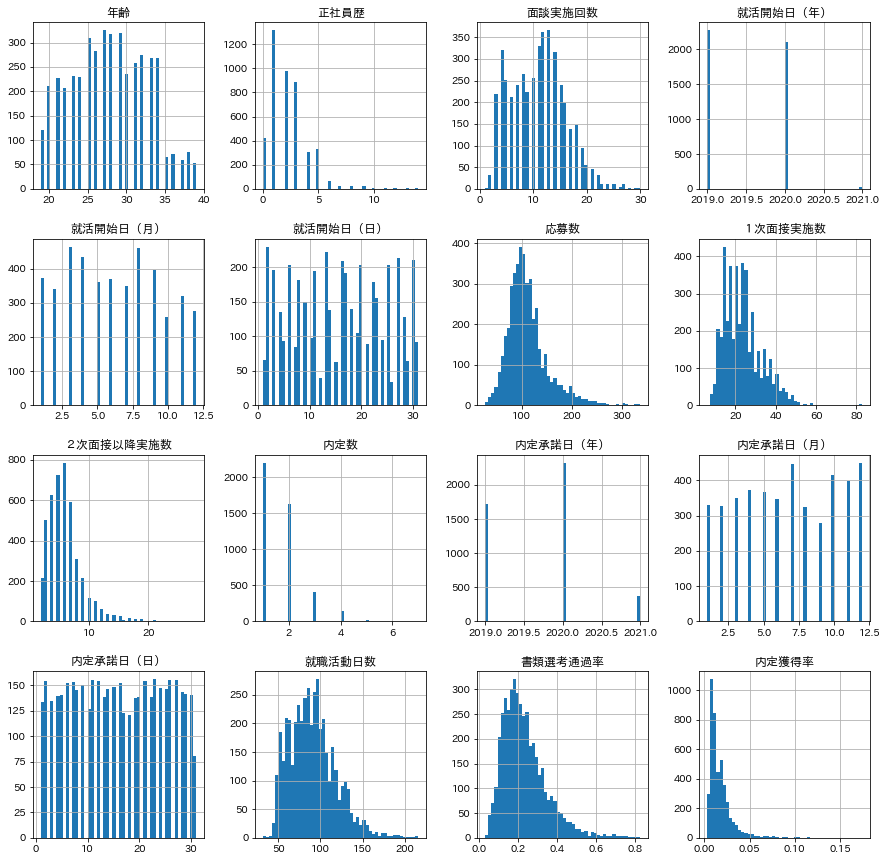

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = (15,15)

df.hist(bins=50)
plt.show()

## （３）欠損値チェック

In [5]:
df.isnull().sum()

年齢           0
性別           0
最終学歴         0
正社員歴         0
就業状況         0
ポートフォリオ有無    0
マネジメント経験     0
難関大卒         0
PF高クオリティ     0
有名企業在籍経験     0
中退歴          0
既往歴          0
短期離職経験       0
面談実施回数       0
希望年収         0
希望職種         0
希望業種         0
希望エリア        0
就活開始日        0
就活開始日（年）     0
就活開始日（月）     0
就活開始日（日）     0
応募数          0
１次面接実施数      0
２次面接以降実施数    0
内定数          0
内定承諾日        0
内定承諾日（年）     0
内定承諾日（月）     0
内定承諾日（日）     0
就職活動日数       0
書類選考通過率      0
内定獲得率        0
dtype: int64

# **3.データ前処理**

## （１）2値ラベルの数値化

In [6]:
mf_map = {'男':1, '女':0}
pf_map = {'有':1, '無':0}
manegement_map = {'有':1, '無':0}
high_level_univ_map = {'有':1, '無':0}
high_quality_pf_map = {'有':1, '無':0}
famous_company_map = {'有':1, '無':0}
drop_out_school_map = {'有':1, '無':0}
quit_early_map = {'有':1, '無':0}

df['性別'] = df['性別'].map(mf_map)
df['ポートフォリオ有無'] = df['ポートフォリオ有無'].map(pf_map)
df['マネジメント経験'] = df['マネジメント経験'].map(manegement_map)
df['難関大卒'] = df['難関大卒'].map(high_level_univ_map)
df['PF高クオリティ'] = df['PF高クオリティ'].map(high_quality_pf_map)
df['有名企業在籍経験'] = df['有名企業在籍経験'].map(famous_company_map)


df['中退歴'] = df['中退歴'].map(drop_out_school_map)
df['短期離職経験'] = df['短期離職経験'].map(quit_early_map)

## （２）多値ラベルの数値化

In [7]:
def enc(df,column):
  df_dummy = pd.get_dummies(df[column], prefix=column)

  df_drop = df.drop([column], axis=1)

  df1 = pd.concat([df_drop,df_dummy], axis=1)

  return df1

In [8]:
df = enc(df, '最終学歴')
df = enc(df, '就業状況')
df = enc(df, '既往歴')
df = enc(df, '希望年収')
df = enc(df, '希望職種')
df = enc(df, '希望業種')
df = enc(df, '希望エリア')

display(df.head())

,年齢,性別,正社員歴,ポートフォリオ有無,マネジメント経験,難関大卒,PF高クオリティ,有名企業在籍経験,中退歴,短期離職経験,面談実施回数,就活開始日,就活開始日（年）,就活開始日（月）,就活開始日（日）,応募数,１次面接実施数,２次面接以降実施数,内定数,内定承諾日,内定承諾日（年）,内定承諾日（月）,内定承諾日（日）,就職活動日数,書類選考通過率,内定獲得率,最終学歴_中卒,最終学歴_大卒,最終学歴_短大卒・専門卒,最終学歴_院卒,最終学歴_高卒,最終学歴_高専卒,就業状況_バイト・派遣,就業状況_在職中,就業状況_離職中,既往歴_無,既往歴_精神,既往歴_身体,希望年収_400万円以上,希望年収_〜300万円,希望年収_〜350万円,希望年収_〜400万円,希望年収_希望なし,希望職種_ITコンサル・営業,希望職種_インフラエンジニア,希望職種_バックエンドエンジニア,希望職種_フロントエンドエンジニア,希望職種_希望なし・その他,希望業種_SES,希望業種_受託開発企業,希望業種_希望なし・その他,希望業種_自社開発企業,希望エリア_その他地方都市,希望エリア_全国可,希望エリア_大阪のみ,希望エリア_東京のみ,希望エリア_東京・大阪
0,28,1,2,1,0,0,0,0,0,0,6,2019-01-07,2019,1,7,101,42,9,2,2019-04-06,2019,4,6,89,0.4158,0.0198,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,33,1,2,0,1,1,0,0,0,0,3,2019-01-07,2019,1,7,85,13,6,4,2019-03-28,2019,3,28,80,0.1529,0.0471,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,27,1,3,1,0,0,0,0,0,0,13,2019-01-07,2019,1,7,150,29,5,2,2019-04-14,2019,4,14,97,0.1933,0.0133,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,27,1,2,0,0,0,0,0,0,0,9,2019-01-07,2019,1,7,66,16,4,1,2019-05-13,2019,5,13,126,0.2424,0.0152,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,31,1,3,1,1,0,0,0,0,0,3,2019-01-07,2019,1,7,73,27,8,3,2019-03-01,2019,3,1,53,0.3699,0.0411,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0


# **4.データ分割**

In [9]:
print(df.columns)

Index(['年齢', '性別', '正社員歴', 'ポートフォリオ有無', 'マネジメント経験', '難関大卒', 'PF高クオリティ',
       '有名企業在籍経験', '中退歴', '短期離職経験', '面談実施回数', '就活開始日', '就活開始日（年）', '就活開始日（月）',
       '就活開始日（日）', '応募数', '１次面接実施数', '２次面接以降実施数', '内定数', '内定承諾日', '内定承諾日（年）',
       '内定承諾日（月）', '内定承諾日（日）', '就職活動日数', '書類選考通過率', '内定獲得率', '最終学歴_中卒',
       '最終学歴_大卒', '最終学歴_短大卒・専門卒', '最終学歴_院卒', '最終学歴_高卒', '最終学歴_高専卒',
       '就業状況_バイト・派遣', '就業状況_在職中', '就業状況_離職中', '既往歴_無', '既往歴_精神', '既往歴_身体',
       '希望年収_400万円以上', '希望年収_〜300万円', '希望年収_〜350万円', '希望年収_〜400万円',
       '希望年収_希望なし', '希望職種_ITコンサル・営業', '希望職種_インフラエンジニア', '希望職種_バックエンドエンジニア',
       '希望職種_フロントエンドエンジニア', '希望職種_希望なし・その他', '希望業種_SES', '希望業種_受託開発企業',
       '希望業種_希望なし・その他', '希望業種_自社開発企業', '希望エリア_その他地方都市', '希望エリア_全国可',
       '希望エリア_大阪のみ', '希望エリア_東京のみ', '希望エリア_東京・大阪'],
      dtype='object')


## （１）入力データ・正解データ分割

In [10]:
df['就活開始日'] = pd.to_datetime(df['就活開始日'])
df['内定承諾日'] = pd.to_datetime(df['内定承諾日'])

# 入力データ
insert = df.drop([
        '面談実施回数', '就活開始日', '就活開始日（年）', '就活開始日（月）',
       '就活開始日（日）', '１次面接実施数', '２次面接以降実施数', '内定数', '内定承諾日', '内定承諾日（年）',
       '内定承諾日（月）', '内定承諾日（日）', '就職活動日数', '書類選考通過率', '内定獲得率',
       '希望年収_400万円以上', '希望年収_〜300万円', '希望年収_〜350万円', '希望年収_〜400万円',
       '希望年収_希望なし', '希望職種_ITコンサル・営業', '希望職種_インフラエンジニア', '希望職種_バックエンドエンジニア',
       '希望職種_フロントエンドエンジニア', '希望職種_希望なし・その他', '希望業種_SES', '希望業種_受託開発企業',
       '希望業種_希望なし・その他', '希望業種_自社開発企業', '希望エリア_その他地方都市', '希望エリア_全国可',
       '希望エリア_大阪のみ', '希望エリア_東京のみ', '希望エリア_東京・大阪' 

      ], axis=1)
print(insert.columns)

# 正解データ 
# 正解データA書類選考通過率
answerA = df['書類選考通過率'].values

# 正解データB内定獲得率
answerB = df['内定獲得率'].values

Index(['年齢', '性別', '正社員歴', 'ポートフォリオ有無', 'マネジメント経験', '難関大卒', 'PF高クオリティ',
       '有名企業在籍経験', '中退歴', '短期離職経験', '応募数', '最終学歴_中卒', '最終学歴_大卒',
       '最終学歴_短大卒・専門卒', '最終学歴_院卒', '最終学歴_高卒', '最終学歴_高専卒', '就業状況_バイト・派遣',
       '就業状況_在職中', '就業状況_離職中', '既往歴_無', '既往歴_精神', '既往歴_身体'],
      dtype='object')


## （２）学習データ・検証データ分割

In [11]:
mday = pd.to_datetime('2020-12-1')
train_index = df['就活開始日'] < mday
test_index = df['就活開始日'] >= mday

# 入力データ
i_train = insert[train_index]
i_test = insert[test_index]

# 正解データA書類選考通過率
a_trainA = answerA[train_index]
a_testA = answerA[test_index]

# 正解データB内定獲得率
a_trainB = answerB[train_index]
a_testB = answerB[test_index]

# **5.アルゴリズム選択**

### （１）候補アルゴリズムリスト化

In [12]:
# 線形回帰
from sklearn.linear_model import LinearRegression
algorithm1 = LinearRegression()

# リッジ回帰
from sklearn.linear_model import Ridge
algorithm2 = Ridge()

#XGBoost 
from xgboost import XGBRegressor
algorithm3 = XGBRegressor(objective='reg:squarederror')


algorithms = [algorithm1, algorithm2, algorithm3]

## （２）目的変数ごとの検証

In [13]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=4)

from sklearn.model_selection import cross_val_score

# 書類選考通過率
print('書類選考通過率')
print('-------------------')
for al in algorithms:
  scores = cross_val_score(al, i_train, a_trainA, cv=kfold)
  score = scores.mean()
  name = al.__class__.__name__

  print(f'平均スコア:{score:.4f} 個別スコア：{scores} {name}')

print()
print('===================')
print()

# 内定獲得率
print('内定獲得率')
print('-------------')
for al in algorithms:
  scores = cross_val_score(al, i_train, a_trainB, cv=kfold)
  score = scores.mean()
  name = al.__class__.__name__

  print(f'平均スコア:{score:.4f} 個別スコア：{scores} {name}')

書類選考通過率
-------------------
平均スコア:0.5422 個別スコア：[0.5088 0.5379 0.5491 0.5731] LinearRegression
平均スコア:0.5423 個別スコア：[0.5092 0.538  0.5491 0.5728] Ridge
平均スコア:0.5940 個別スコア：[0.5323 0.6106 0.5959 0.6372] XGBRegressor


内定獲得率
-------------
平均スコア:0.5397 個別スコア：[0.5436 0.5111 0.5036 0.6005] LinearRegression
平均スコア:0.5399 個別スコア：[0.5427 0.5116 0.5046 0.6006] Ridge
平均スコア:0.6895 個別スコア：[0.7156 0.7123 0.6572 0.6731] XGBRegressor


<u>選択アルゴリズム</u><br>
①書類選考通過率・・・xgboost<br>
②内定獲得率・・・・・xgboost

# **6.学習・予測**

## （１）目的変数ごとの学習・予測

In [14]:
# 書類選考通過率
algorithmA = XGBRegressor(objective='reg:squarederror')

algorithmA.fit(i_train, a_trainA)
a2_predA = algorithmA.predict(i_test)

print('書類選考通過率')
print(a2_predA[:5])
print()
print('----------------------------')
print()

# 内定獲得率
algorithmB = XGBRegressor(objective='reg:squarederror')

algorithmB.fit(i_train, a_trainB)
a2_predB = algorithmB.predict(i_test)
print('内定獲得率')
print(a2_predB[:5])

書類選考通過率
[0.3021 0.3463 0.2169 0.1625 0.2148]

----------------------------

内定獲得率
[0.0197 0.023  0.0098 0.0095 0.0128]


# **7.評価**

## （１）R2値

In [15]:
# 書類選考通過率
scoreA = algorithmA.score(i_test, a_testA)

from sklearn.metrics import r2_score
r2_scoreA = r2_score(a_testA, a2_predA)

print('書類選考通過率')
print(f'score:{scoreA:.4f} r2_score: {r2_scoreA:.4f}')

print()
print('----------------------------')
print()

# 内定獲得率
scoreB = algorithmB.score(i_test, a_testB)

from sklearn.metrics import r2_score
r2_scoreB = r2_score(a_testB, a2_predB)
print('内定獲得率')
print(f'score:{scoreB:.4f} r2_score: {r2_scoreB:.4f}')

書類選考通過率
score:0.6489 r2_score: 0.6489

----------------------------

内定獲得率
score:0.7624 r2_score: 0.7624


## （２）散布図比較

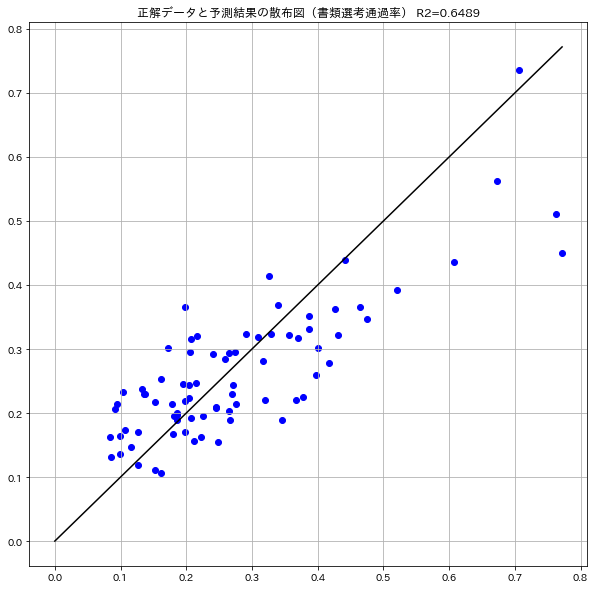

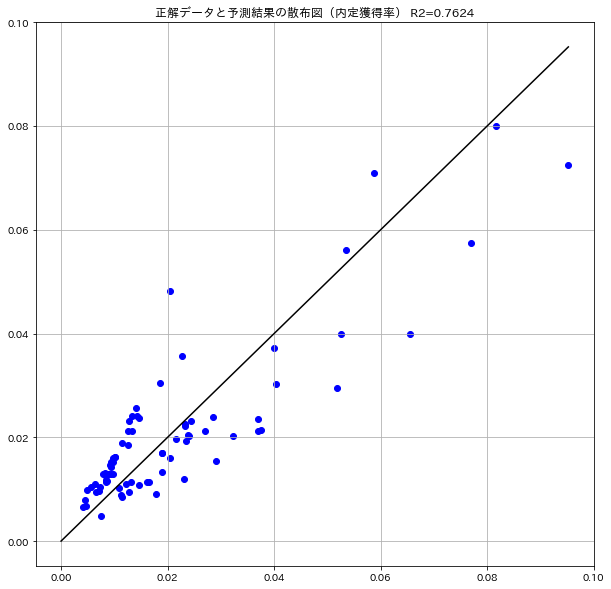

In [16]:
# 書類選考通過率
plt.figure(figsize=(10,10))
a2_maxA = a_testA.max()
plt.plot((0, a2_maxA), (0, a2_maxA), c='k')
plt.scatter(a_testA, a2_predA, c='b')
plt.title(f'正解データと予測結果の散布図（書類選考通過率） R2={scoreA:.4f}')
plt.grid()
plt.show()

# 内定獲得率
plt.figure(figsize=(10,10))
a2_maxB = a_testB.max()
plt.plot((0, a2_maxB), (0, a2_maxB), c='k')
plt.scatter(a_testB, a2_predB, c='b')
plt.title(f'正解データと予測結果の散布図（内定獲得率） R2={scoreB:.4f}')
plt.grid()
plt.show()

## （３）重要度分析

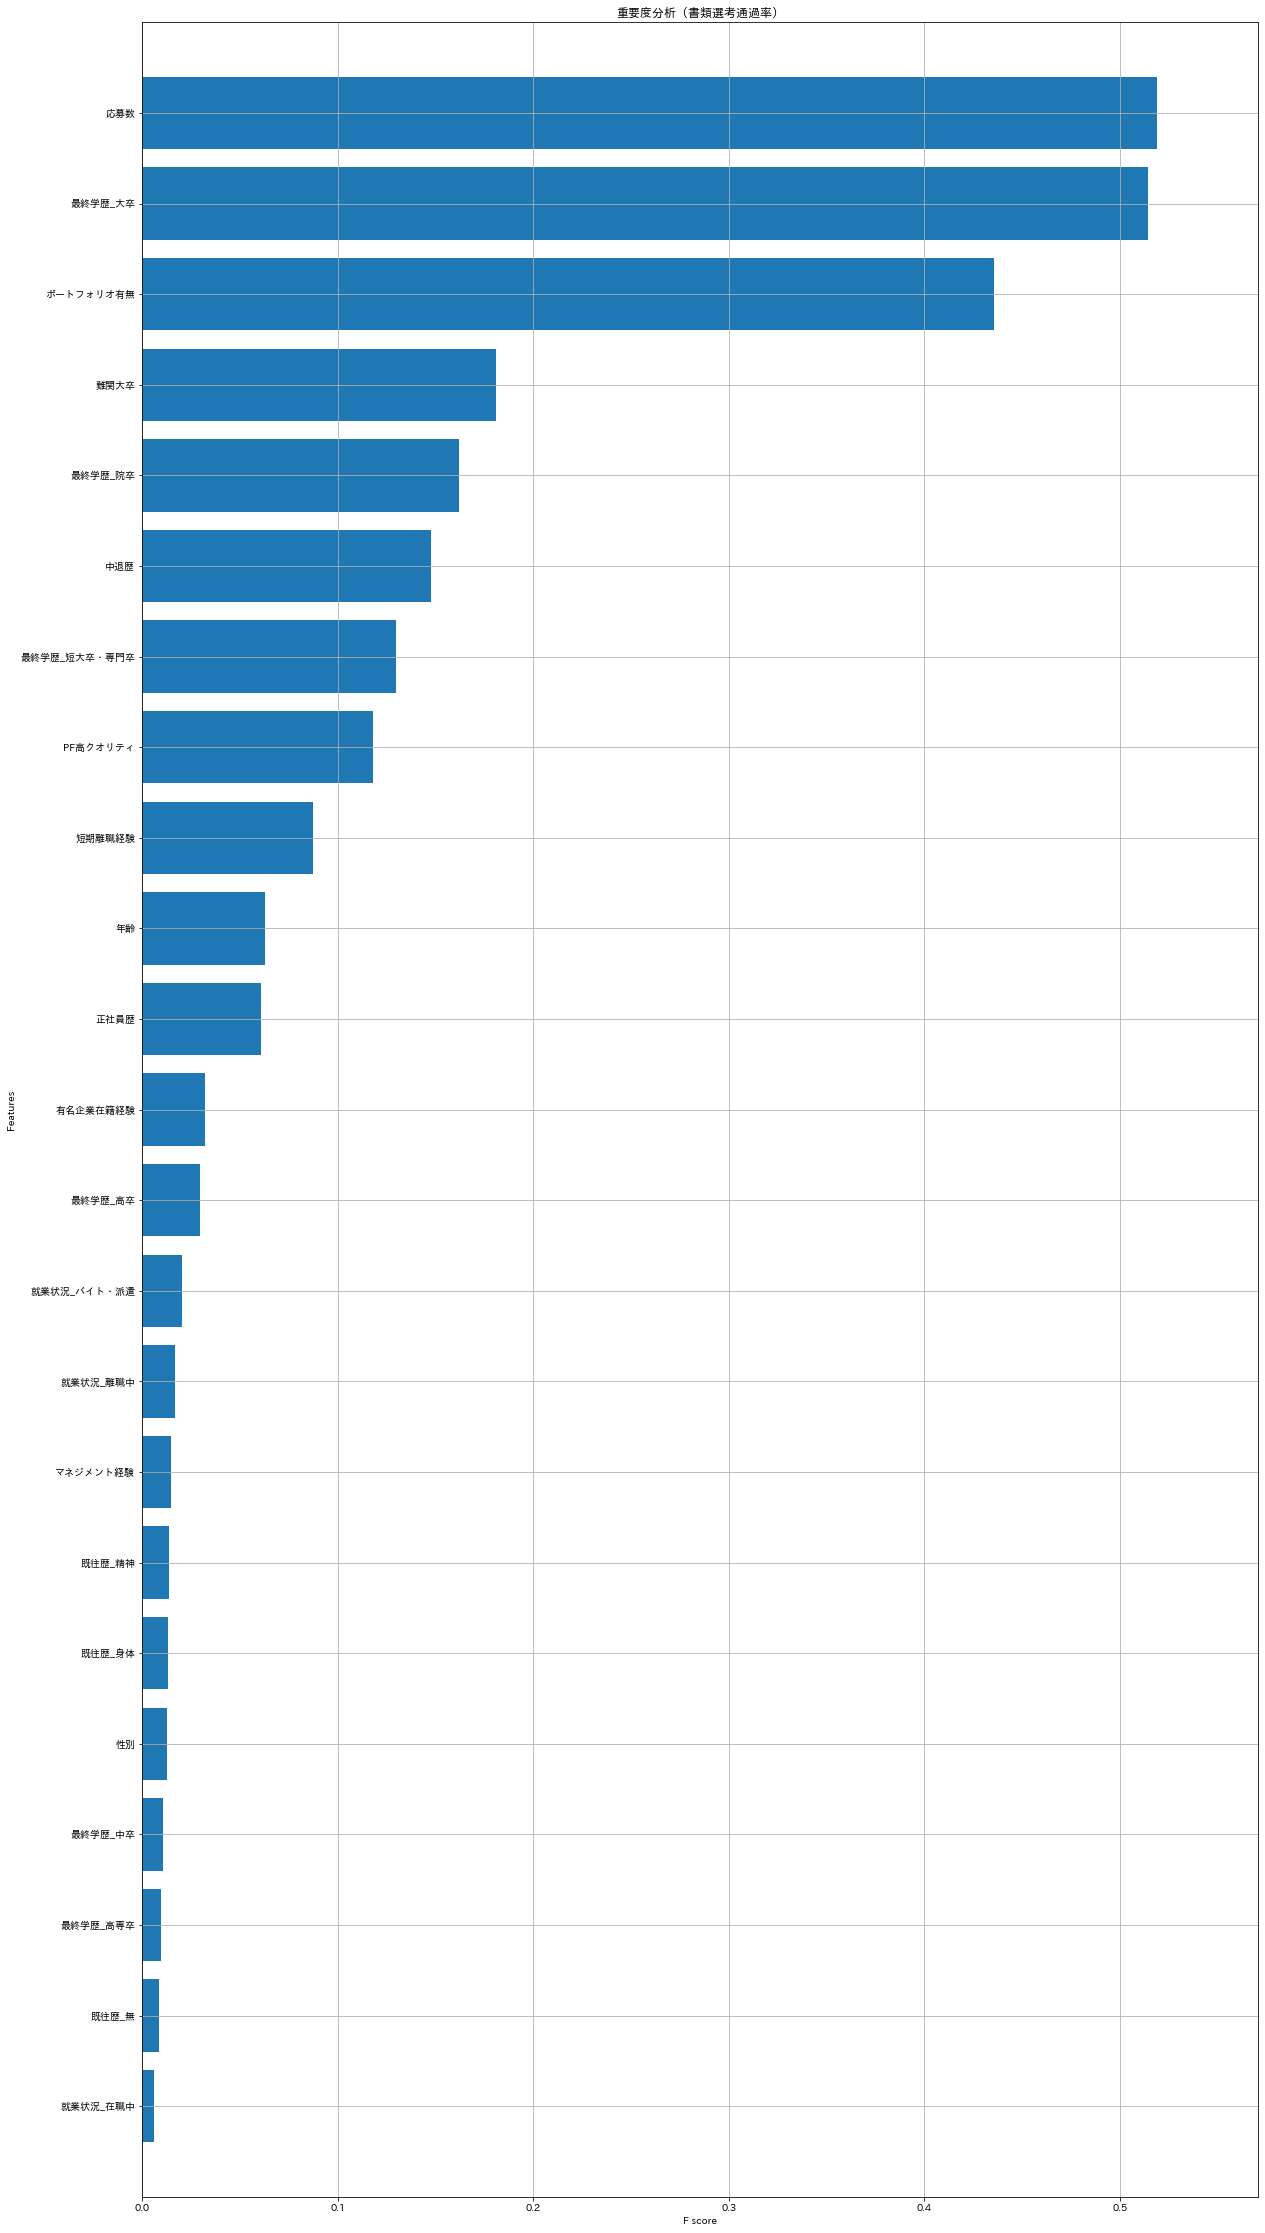

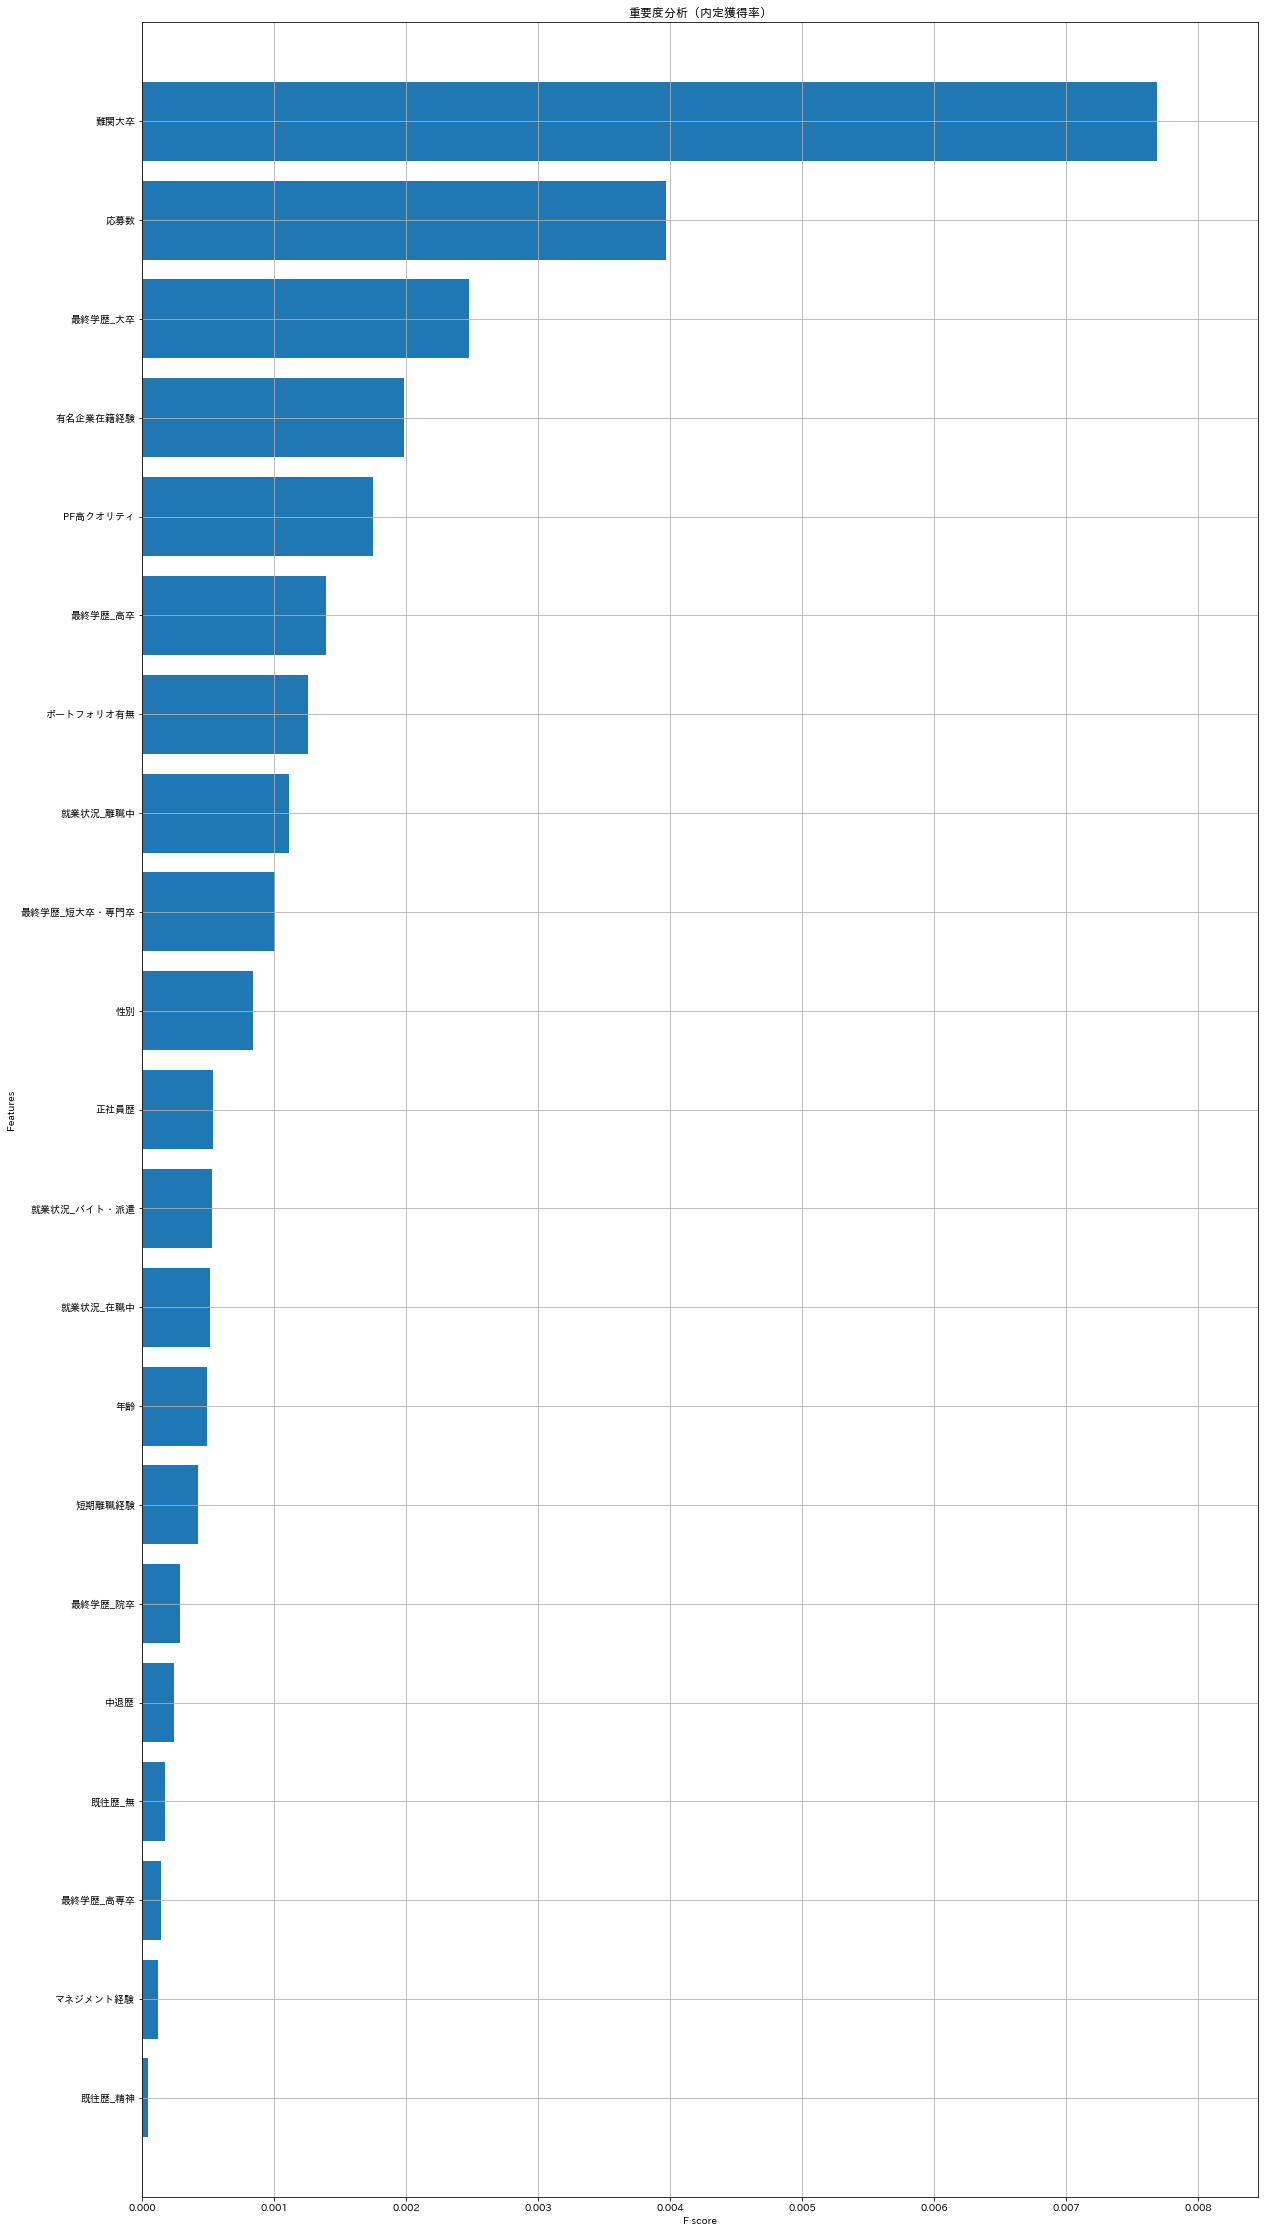

In [17]:
import xgboost as xgb

# 書類選考通過率
fig, ax = plt.subplots(figsize=(20,40))
xgb.plot_importance(algorithmA, ax=ax, height=0.8, importance_type='gain',
                    show_values=False, title='重要度分析（書類選考通過率）')


# 内定獲得率
fig, ax = plt.subplots(figsize=(20,40))
xgb.plot_importance(algorithmB, ax=ax, height=0.8, importance_type='gain',
                    show_values=False, title='重要度分析（内定獲得率）')

# **8.チュ−ニング**

## 【ハイパーパラメーター最適化】

## （１）デフォルト値確認

In [18]:
algorithm = XGBRegressor()
print(algorithm)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


## （２）書類選考通過率

### ①チューニング

#### [eta]

In [19]:
# eta
etas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

print('eta')
for eta in etas:
  algorithm = XGBRegressor(objective='reg:squarederror')
  algorithm.fit(i_train, a_trainA)
  score = algorithm.score(i_test, a_testA)
  print(f'score: {score:.4f}  eta: {eta}')

eta
score: 0.6489  eta: 0.0001
score: 0.6489  eta: 0.001
score: 0.6489  eta: 0.01
score: 0.6489  eta: 0.1
score: 0.6489  eta: 0.3
score: 0.6489  eta: 0.5
score: 0.6489  eta: 0.7
score: 0.6489  eta: 0.9
score: 0.6489  eta: 1.0


eta:0.3

#### [max_depth]

In [20]:
maxDepthes = [1,2,3,4,5,6,7,8,9,10]

print('man_depth')
for d in maxDepthes:
  algorithm = XGBRegressor(max_depth=d, objective='reg:squarederror')
  algorithm.fit(i_train, a_trainA)
  score = algorithm.score(i_test, a_testA)
  print(f'score: {score:.4f}  max_depth: {d}')

man_depth
score: 0.5804  max_depth: 1
score: 0.6247  max_depth: 2
score: 0.6489  max_depth: 3
score: 0.6312  max_depth: 4
score: 0.6283  max_depth: 5
score: 0.6276  max_depth: 6
score: 0.6295  max_depth: 7
score: 0.6075  max_depth: 8
score: 0.6290  max_depth: 9
score: 0.6296  max_depth: 10


max_depth:3

#### [min_child_weight]

In [21]:
minChildWeights=[1,2,3,4,5,6,7,8,9,10,15,20,30,40]

for w in minChildWeights:
  algorithm = XGBRegressor(min_child_weight=w, objective='reg:squarederror')
  algorithm.fit(i_train, a_trainA)
  score = algorithm.score(i_test, a_testA)
  print(f'score: {score:.4f}  min_child_weight: {w}')

score: 0.6489  min_child_weight: 1
score: 0.6487  min_child_weight: 2
score: 0.6498  min_child_weight: 3
score: 0.6523  min_child_weight: 4
score: 0.6447  min_child_weight: 5
score: 0.6381  min_child_weight: 6
score: 0.6418  min_child_weight: 7
score: 0.6394  min_child_weight: 8
score: 0.6434  min_child_weight: 9
score: 0.6368  min_child_weight: 10
score: 0.6351  min_child_weight: 15
score: 0.6366  min_child_weight: 20
score: 0.6357  min_child_weight: 30
score: 0.6353  min_child_weight: 40


min_child_weight:4

#### [subsample]

In [22]:
subSamples=[0.1,0.3,0.5,0.7,0.9,1]

for s in subSamples:
  algorithm = XGBRegressor(subsample=s, objective='reg:squarederror', min_child_weight=4)
  algorithm.fit(i_train, a_trainA)
  score = algorithm.score(i_test, a_testA)
  print(f'score: {score:.4f}  subsample: {s}')

score: 0.6433  subsample: 0.1
score: 0.6494  subsample: 0.3
score: 0.6528  subsample: 0.5
score: 0.6533  subsample: 0.7
score: 0.6417  subsample: 0.9
score: 0.6523  subsample: 1


subsample:0.7

#### [colsample_bytree]

In [23]:
colsampleBytrees=[0.1,0.3,0.5,0.7,0.9,1]

for cs in colsampleBytrees:
  algorithm = XGBRegressor(colsample_bytree=cs, objective='reg:squarederror', min_child_weight=4, subsample=0.7)
  algorithm.fit(i_train, a_trainA)
  score = algorithm.score(i_test, a_testA)
  print(f'score: {score:.4f}  colsample_bytree: {cs}')

score: 0.5655  colsample_bytree: 0.1
score: 0.6349  colsample_bytree: 0.3
score: 0.6397  colsample_bytree: 0.5
score: 0.6484  colsample_bytree: 0.7
score: 0.6425  colsample_bytree: 0.9
score: 0.6533  colsample_bytree: 1


colsample_bytree:1

### ②再検証

#### [学習・予測]

In [24]:
algorithmA = XGBRegressor(objective='reg:squarederror', min_child_weight=4, subsample=0.7)

algorithmA.fit(i_train, a_trainA)
a2_predA = algorithmA.predict(i_test)

print(a2_predA[:5])

[0.3095 0.3467 0.2151 0.1651 0.22  ]


#### [評価]

再検証（書類選考通過率）
-------------------------------------------------

R2値
score:0.6533 r2_score: 0.6533
------------------------------------------------------


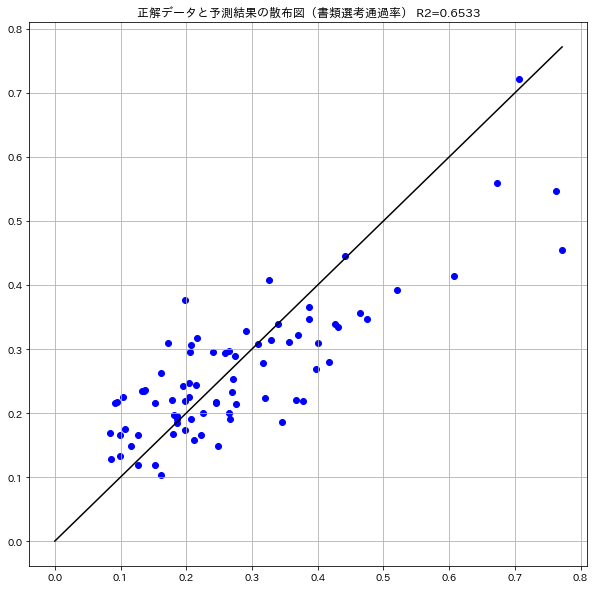

------------------------------------------------------


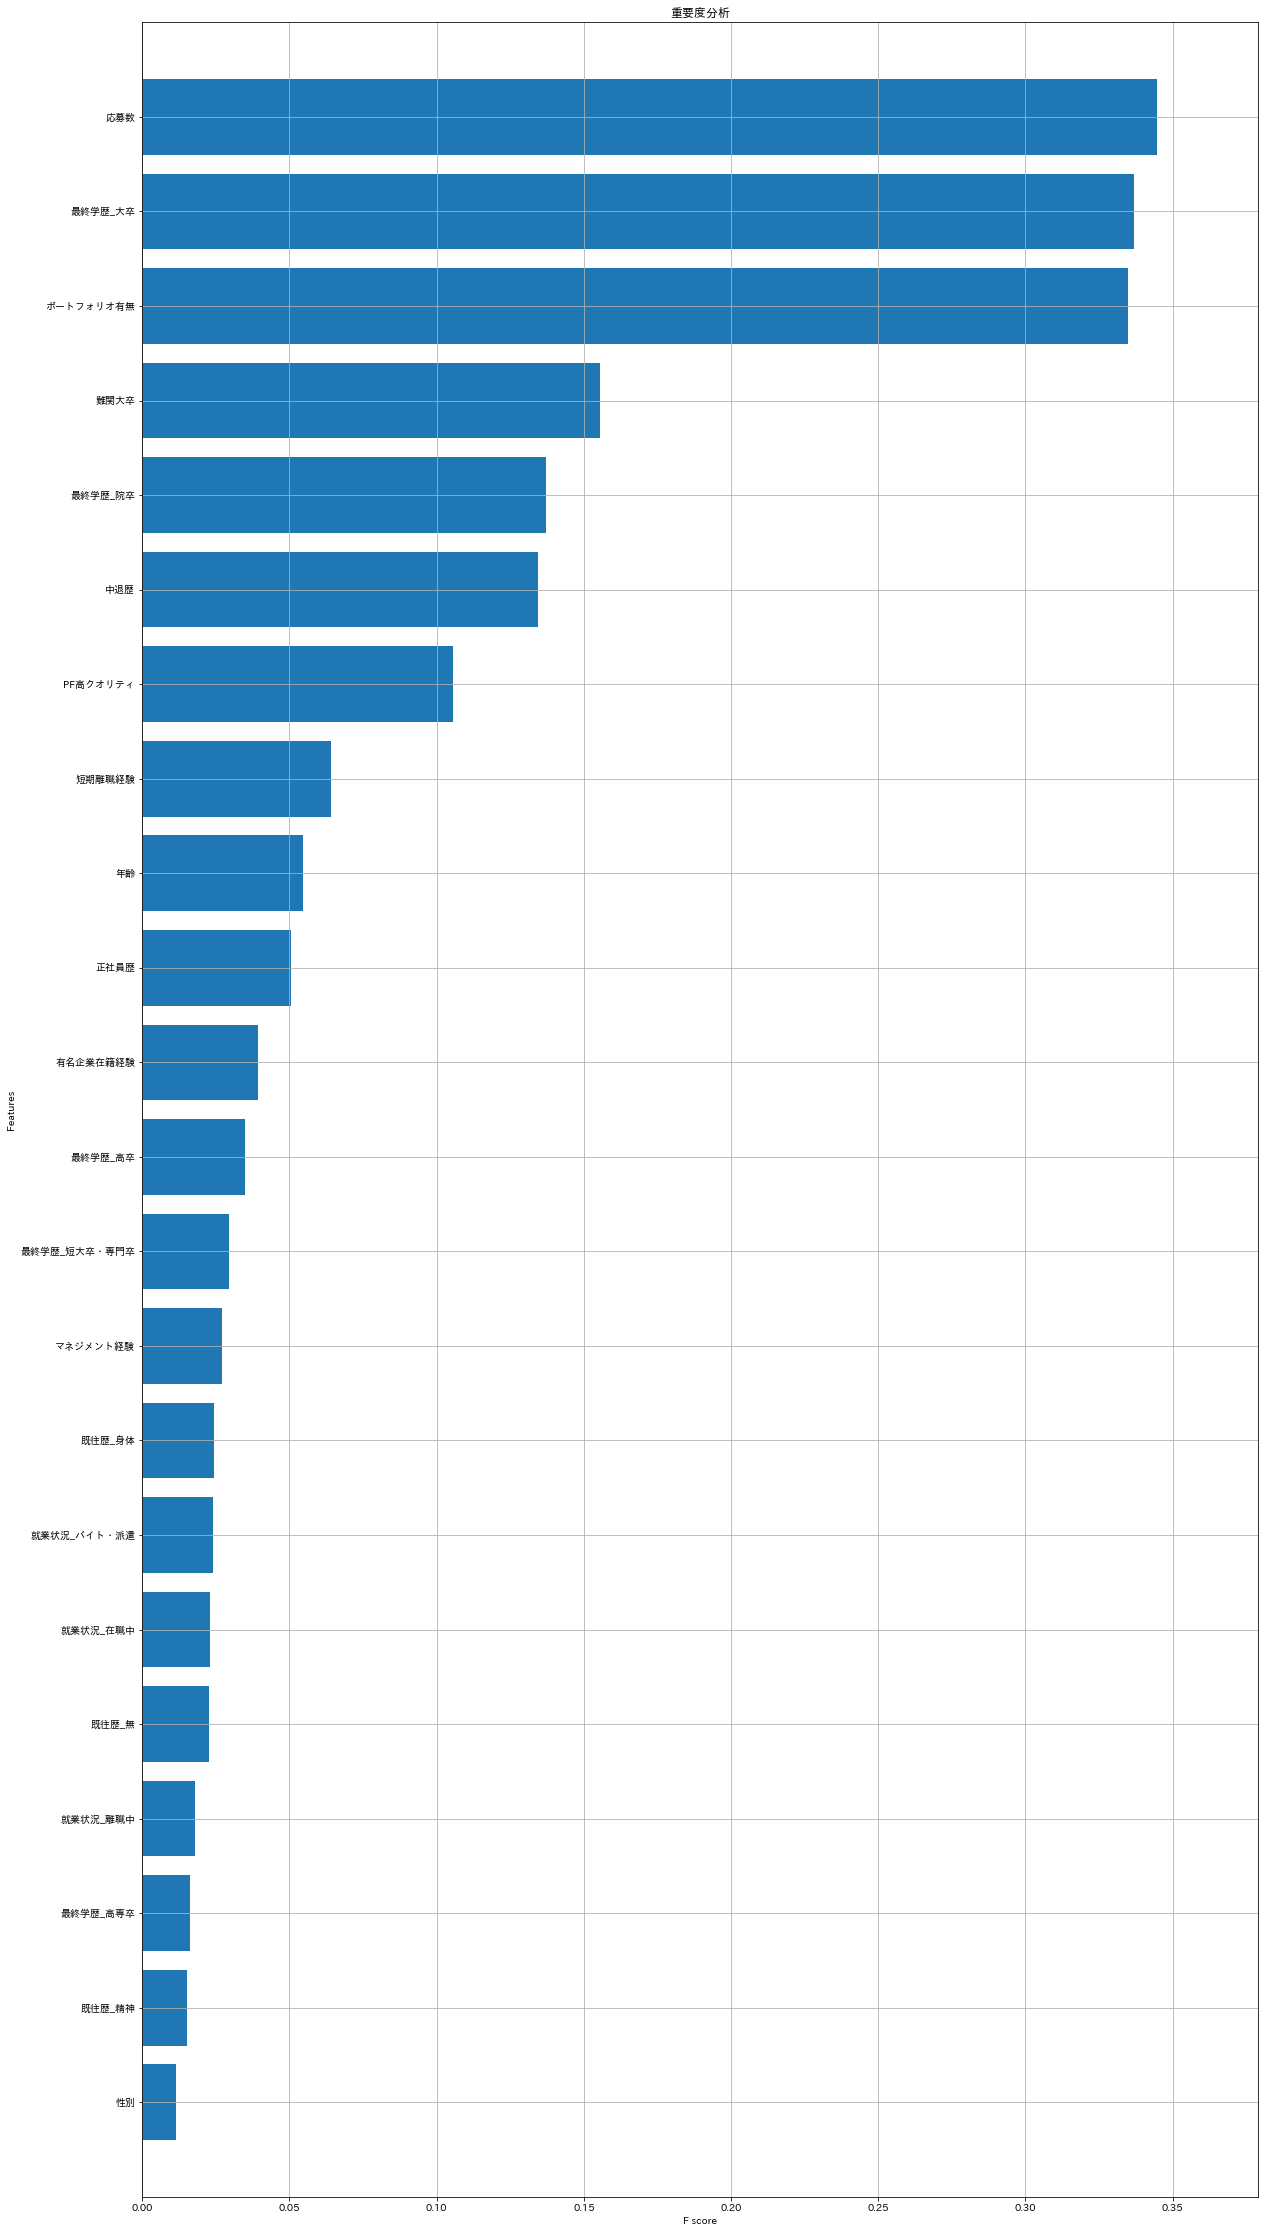

In [25]:
print('再検証（書類選考通過率）')
print('-------------------------------------------------')
print()

# R2値
scoreA = algorithmA.score(i_test, a_testA)

from sklearn.metrics import r2_score
r2_scoreA = r2_score(a_testA, a2_predA)

print('R2値')
print(f'score:{scoreA:.4f} r2_score: {r2_scoreA:.4f}')
print('------------------------------------------------------')

# 散布図
plt.figure(figsize=(10,10))
a2_maxA = a_testA.max()
plt.plot((0, a2_maxA), (0, a2_maxA), c='k')
plt.scatter(a_testA, a2_predA, c='b')
plt.title(f'正解データと予測結果の散布図（書類選考通過率） R2={scoreA:.4f}')
plt.grid()
plt.show()
print('------------------------------------------------------')

# 重要度分析
import xgboost as xgb
fig, ax = plt.subplots(figsize=(20,40))
xgb.plot_importance(algorithmA, ax=ax, height=0.8, importance_type='gain',
                    show_values=False, title='重要度分析')

## （３）内定獲得率

### ①チューニング

#### [eta]

In [26]:
etas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

print('eta')
for eta in etas:
  algorithm = XGBRegressor(objective='reg:squarederror')
  algorithm.fit(i_train, a_trainB)
  score = algorithm.score(i_test, a_testB)
  print(f'score: {score:.4f}  eta: {eta}')

eta
score: 0.7624  eta: 0.0001
score: 0.7624  eta: 0.001
score: 0.7624  eta: 0.01
score: 0.7624  eta: 0.1
score: 0.7624  eta: 0.3
score: 0.7624  eta: 0.5
score: 0.7624  eta: 0.7
score: 0.7624  eta: 0.9
score: 0.7624  eta: 1.0


eta:0.3

#### [max_depth]

In [27]:
maxDepthes = [1,2,3,4,5,6,7,8,9,10]

print('max_depth')
for d in maxDepthes:
  algorithm = XGBRegressor(max_depth=d, objective='reg:squarederror')
  algorithm.fit(i_train, a_trainB)
  score = algorithm.score(i_test, a_testB)
  print(f'score: {score:.4f}  max_depth: {d}')

max_depth
score: 0.7488  max_depth: 1
score: 0.7650  max_depth: 2
score: 0.7624  max_depth: 3
score: 0.7591  max_depth: 4
score: 0.7839  max_depth: 5
score: 0.7702  max_depth: 6
score: 0.7662  max_depth: 7
score: 0.7512  max_depth: 8
score: 0.7391  max_depth: 9
score: 0.7433  max_depth: 10


max_depth:5

#### [min_child_weight]

In [28]:
minChildWeights=[1,2,3,4,5,6,7,8,9,10,15,20,30,40,50]

print('min_child_weight')
for w in minChildWeights:
  algorithm = XGBRegressor(min_child_weight=w, objective='reg:squarederror', max_depth=5)
  algorithm.fit(i_train, a_trainB)
  score = algorithm.score(i_test, a_testB)
  print(f'score: {score:.4f}  min_child_weight: {w}')

min_child_weight
score: 0.7839  min_child_weight: 1
score: 0.7803  min_child_weight: 2
score: 0.7679  min_child_weight: 3
score: 0.7723  min_child_weight: 4
score: 0.7437  min_child_weight: 5
score: 0.7622  min_child_weight: 6
score: 0.7604  min_child_weight: 7
score: 0.7716  min_child_weight: 8
score: 0.7706  min_child_weight: 9
score: 0.7739  min_child_weight: 10
score: 0.7764  min_child_weight: 15
score: 0.7849  min_child_weight: 20
score: 0.7884  min_child_weight: 30
score: 0.8062  min_child_weight: 40
score: 0.8015  min_child_weight: 50


min_child_weight:40

#### [subsample]

In [29]:
subSamples=[0.1,0.3,0.5,0.7,0.9,1]

print('subsample')
for s in subSamples:
  algorithm = XGBRegressor(subsample=s, objective='reg:squarederror', max_depth=5, min_child_weight=40)
  algorithm.fit(i_train, a_trainB)
  score = algorithm.score(i_test, a_testB)
  print(f'score: {score:.4f}  subsample: {s}')

subsample
score: 0.6257  subsample: 0.1
score: 0.7569  subsample: 0.3
score: 0.7692  subsample: 0.5
score: 0.7931  subsample: 0.7
score: 0.8043  subsample: 0.9
score: 0.8062  subsample: 1


subsample:1

#### [colsample_bytree]

In [30]:
colsampleBytrees=[0.1,0.3,0.5,0.7,0.9,1]

print('colsample_bytree')
for cs in colsampleBytrees:
  algorithm = XGBRegressor(colsample_bytree=cs, objective='reg:squarederror', max_depth=5, min_child_weight=40)
  algorithm.fit(i_train, a_trainB)
  score = algorithm.score(i_test, a_testB)
  print(f'score: {score:.4f}  colsample_bytree: {cs}')

colsample_bytree
score: 0.7344  colsample_bytree: 0.1
score: 0.7844  colsample_bytree: 0.3
score: 0.7979  colsample_bytree: 0.5
score: 0.7958  colsample_bytree: 0.7
score: 0.8072  colsample_bytree: 0.9
score: 0.8062  colsample_bytree: 1


colsample_bytree:0.9

### ②再検証

#### [学習・予測]

In [31]:
algorithmB = XGBRegressor(objective='reg:squarederror', max_depth=5, min_child_weight=40, colsample_bytree=0.9)

algorithmB.fit(i_train, a_trainB)
a2_predB = algorithmB.predict(i_test)

print(a2_predB[:5])

[0.0196 0.0227 0.0094 0.0095 0.0124]


#### [評価]

再検証（内定獲得率）
-------------------------------------------------

R2値
score:0.8072 r2_score: 0.8072
------------------------------------------------------


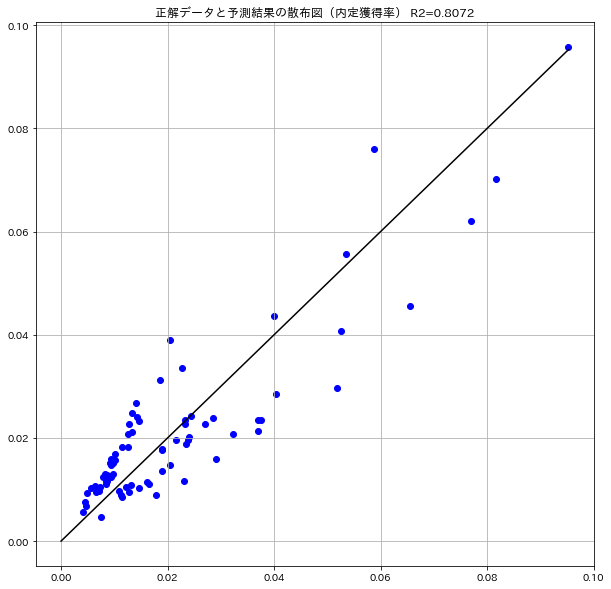

------------------------------------------------------


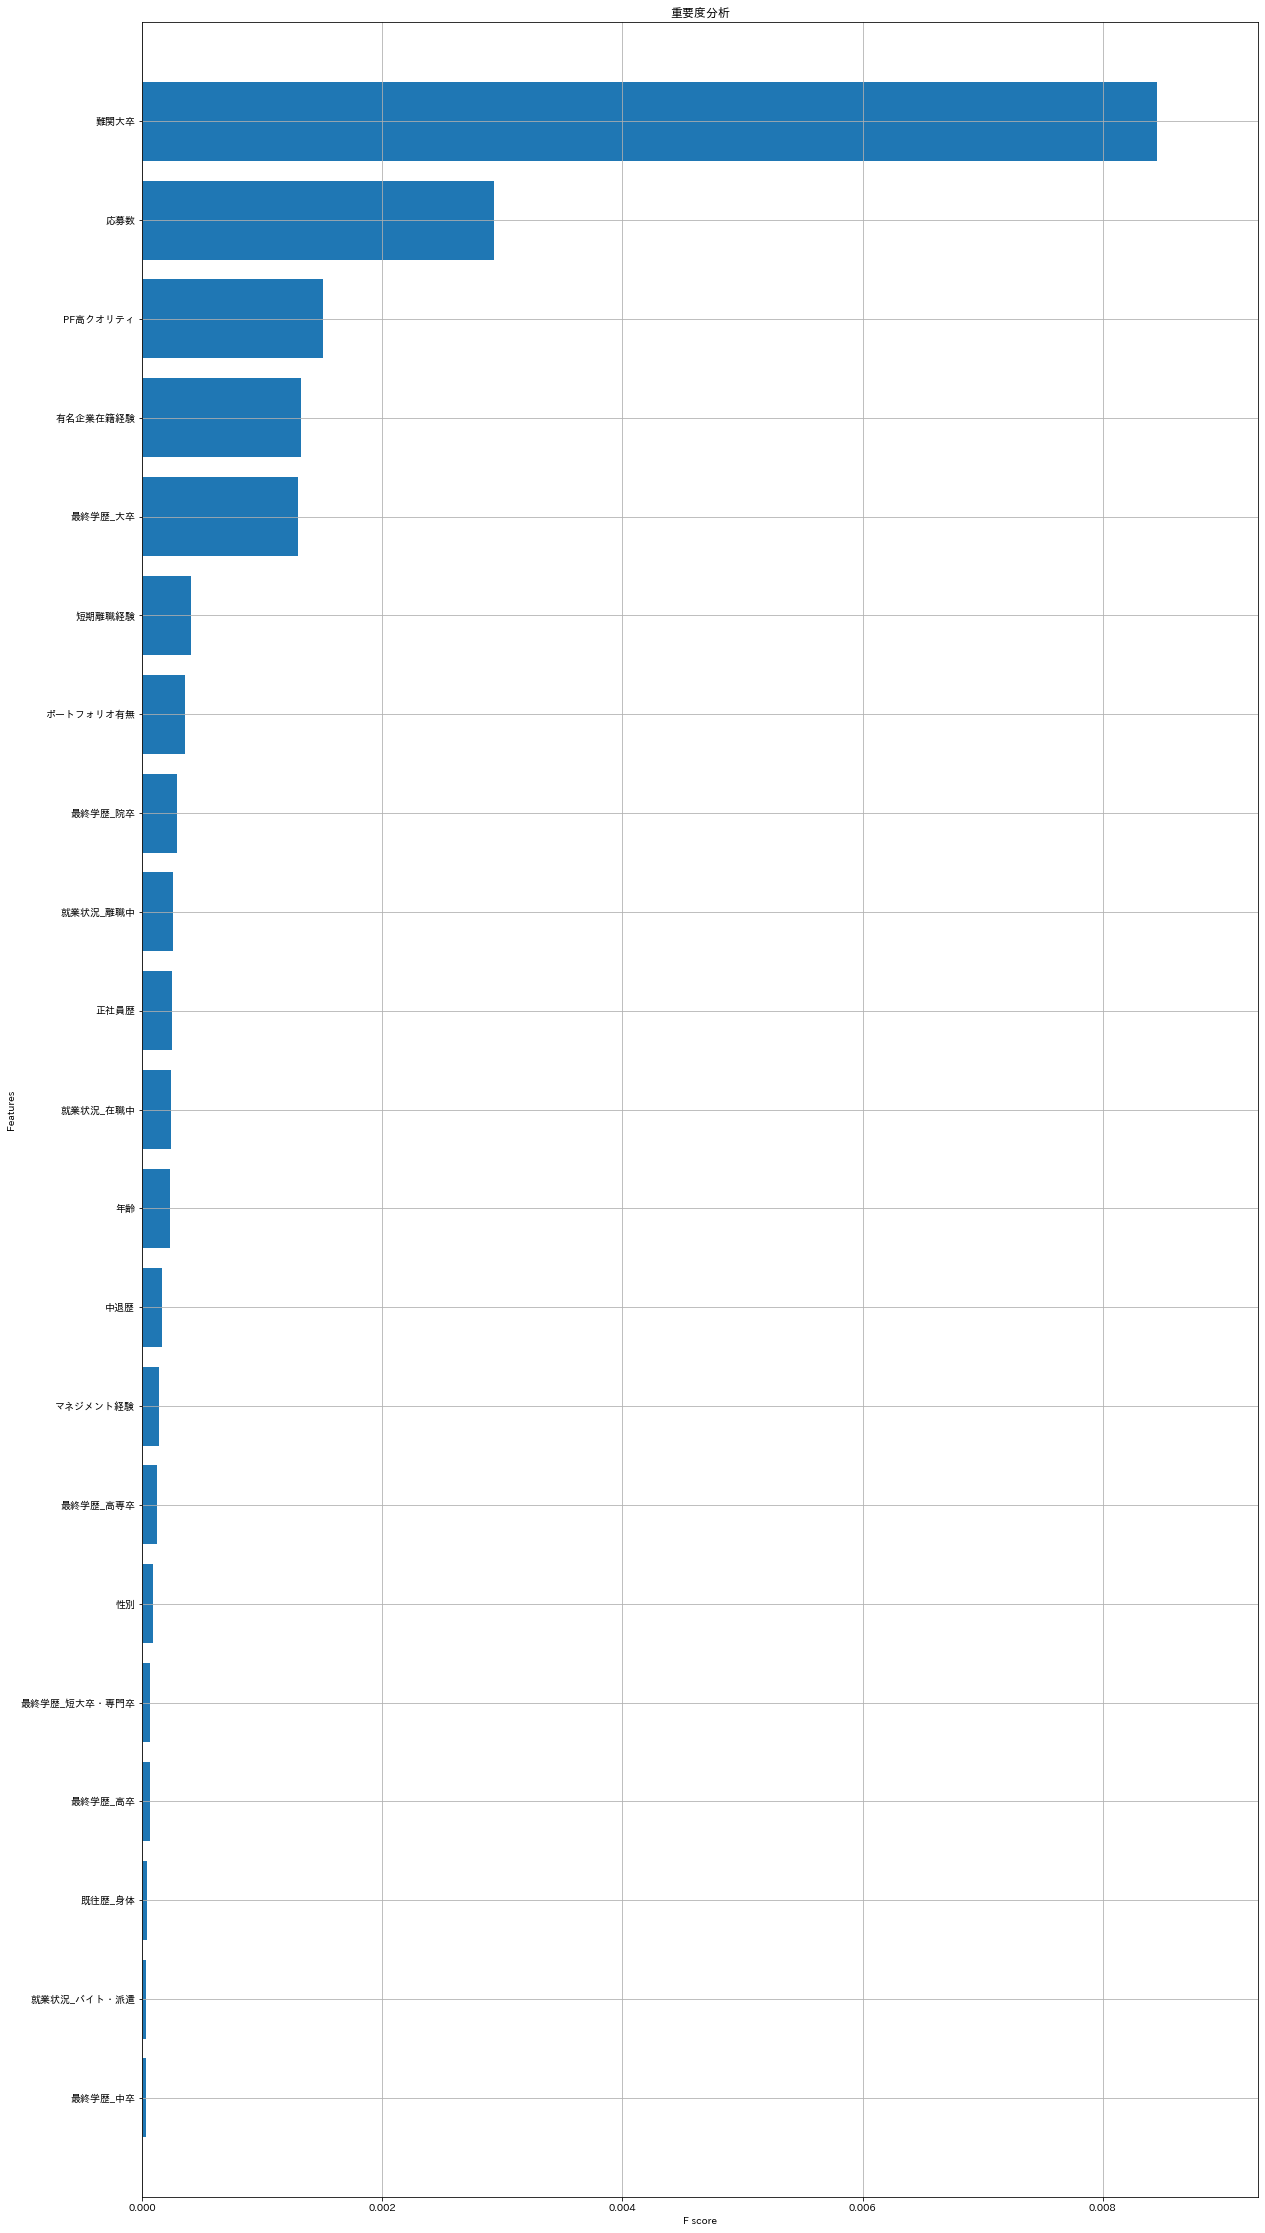

In [32]:
print('再検証（内定獲得率）')
print('-------------------------------------------------')
print()

# R2値
scoreB = algorithmB.score(i_test, a_testB)

from sklearn.metrics import r2_score
r2_scoreB = r2_score(a_testB, a2_predB)

print('R2値')
print(f'score:{scoreB:.4f} r2_score: {r2_scoreB:.4f}')
print('------------------------------------------------------')

# 散布図
plt.figure(figsize=(10,10))
a2_maxB = a_testB.max()
plt.plot((0, a2_maxB), (0, a2_maxB), c='k')
plt.scatter(a_testB, a2_predB, c='b')
plt.title(f'正解データと予測結果の散布図（内定獲得率） R2={scoreB:.4f}')
plt.grid()
plt.show()
print('------------------------------------------------------')

# 重要度分析
import xgboost as xgb
fig, ax = plt.subplots(figsize=(20,40))
xgb.plot_importance(algorithmB, ax=ax, height=0.8, importance_type='gain',
                    show_values=False, title='重要度分析')


# **9.本番データを用いた分析**

※本番データとは<br>
受講生のプロフィールやご経験を広くパターン化したデータ。（年齢、性別、最終学歴、ポートフォリオ有無、正社員歴、就業状況など）<br>
今後、自社就活支援サービスを利用する受講生を想定している。

## （１）データ読み込み・確認・前処理

In [33]:
# データ読み込み
csvfileProduction = open('/content/drive/My Drive/programmingSchoolJobHantingRecordForPortfolioProductionData.csv', 'r', encoding='utf-8')

dfP = pd.read_csv(csvfileProduction)

columnsP = ['年齢','性別','最終学歴','正社員歴','就業状況','ポートフォリオ有無','マネジメント経験','難関大卒','PF高クオリティ','有名企業在籍経験','中退歴','既往歴','短期離職経験','応募数']
dfP.columns = columnsP
dfPOutput = dfP.copy()

# データ確認
print('データ確認')
print()

print('データフレーム表示')
display(dfP.head())
display(dfP.tail())
print(dfP.shape)
print()
print('----------------')
print()

print('欠損値確認')
dfP.isnull().sum()

データ確認

データフレーム表示


,年齢,性別,最終学歴,正社員歴,就業状況,ポートフォリオ有無,マネジメント経験,難関大卒,PF高クオリティ,有名企業在籍経験,中退歴,既往歴,短期離職経験,応募数
0,25,男,院卒,0,離職中,無,無,無,無,無,無,無,無,100
1,25,男,院卒,0,離職中,無,無,無,無,無,無,精神,無,100
2,25,男,院卒,0,離職中,無,無,無,無,無,無,身体,無,100
3,25,男,院卒,0,離職中,無,無,無,有,無,無,無,無,100
4,25,男,院卒,0,離職中,無,無,無,有,無,無,精神,無,100


,年齢,性別,最終学歴,正社員歴,就業状況,ポートフォリオ有無,マネジメント経験,難関大卒,PF高クオリティ,有名企業在籍経験,中退歴,既往歴,短期離職経験,応募数
62683,35,女,中卒,8,バイト・派遣,有,有,無,有,無,無,精神,有,100
62684,35,女,中卒,8,バイト・派遣,有,有,無,有,無,無,身体,有,100
62685,35,女,中卒,8,バイト・派遣,有,有,無,有,無,有,無,有,100
62686,35,女,中卒,8,バイト・派遣,有,有,無,有,無,有,精神,有,100
62687,35,女,中卒,8,バイト・派遣,有,有,無,有,無,有,身体,有,100


(62688, 14)

----------------

欠損値確認


年齢           0
性別           0
最終学歴         0
正社員歴         0
就業状況         0
ポートフォリオ有無    0
マネジメント経験     0
難関大卒         0
PF高クオリティ     0
有名企業在籍経験     0
中退歴          0
既往歴          0
短期離職経験       0
応募数          0
dtype: int64

In [34]:
# データ前処理
# ２値ラベル数値化
dfP['性別'] = dfP['性別'].map(mf_map)
dfP['ポートフォリオ有無'] = dfP['ポートフォリオ有無'].map(pf_map)
dfP['マネジメント経験'] = dfP['マネジメント経験'].map(manegement_map)
dfP['難関大卒'] = dfP['難関大卒'].map(high_level_univ_map)
dfP['PF高クオリティ'] = dfP['PF高クオリティ'].map(high_quality_pf_map)
dfP['有名企業在籍経験'] = dfP['有名企業在籍経験'].map(famous_company_map)
dfP['中退歴'] = dfP['中退歴'].map(drop_out_school_map)
dfP['短期離職経験'] = dfP['短期離職経験'].map(quit_early_map)

# 多値ラベル数値化
dfP = enc(dfP, '最終学歴')
dfP = enc(dfP, '就業状況')
dfP = enc(dfP, '既往歴')
print('ラベル数値化済みデータフレーム確認')
display(dfP.head())

ラベル数値化済みデータフレーム確認


,年齢,性別,正社員歴,ポートフォリオ有無,マネジメント経験,難関大卒,PF高クオリティ,有名企業在籍経験,中退歴,短期離職経験,応募数,最終学歴_中卒,最終学歴_大卒,最終学歴_短大卒・専門卒,最終学歴_院卒,最終学歴_高卒,最終学歴_高専卒,就業状況_バイト・派遣,就業状況_在職中,就業状況_離職中,既往歴_無,既往歴_精神,既往歴_身体
0,25,1,0,0,0,0,0,0,0,0,100,0,0,0,1,0,0,0,0,1,1,0,0
1,25,1,0,0,0,0,0,0,0,0,100,0,0,0,1,0,0,0,0,1,0,1,0
2,25,1,0,0,0,0,0,0,0,0,100,0,0,0,1,0,0,0,0,1,0,0,1
3,25,1,0,0,0,0,1,0,0,0,100,0,0,0,1,0,0,0,0,1,1,0,0
4,25,1,0,0,0,0,1,0,0,0,100,0,0,0,1,0,0,0,0,1,0,1,0


##（２）データ予測

In [35]:
# 予測
# 書類選考通過率
predAProduction = algorithmA.predict(dfP)

print('書類選考通過率')
print(predAProduction[:10])

print('-----------------------------------------------')
# 内定獲得率

predBProduction = algorithmB.predict(dfP)
print('内定獲得率')
print(predBProduction[:10])

書類選考通過率
[0.278  0.2781 0.2781 0.3188 0.3189 0.3189 0.3248 0.3129 0.3129 0.3584]
-----------------------------------------------
内定獲得率
[0.0172 0.0172 0.017  0.0266 0.0266 0.0264 0.0344 0.0344 0.0344 0.0396]


##（３）予測データの出力前処理

In [36]:
# データ型変更
print(type(predAProduction))
print(type(predBProduction))

predAProductionList = predAProduction.tolist()
print(type(predAProductionList))

predBProductionList = predBProduction.tolist()
print(type(predBProductionList))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'list'>


In [37]:
# 出力用データフレームに目的変数の列を追加
dfPOutput['書類選考通過率'] = predAProductionList
dfPOutput['内定獲得率'] = predBProductionList

In [38]:
display(dfPOutput.head())

,年齢,性別,最終学歴,正社員歴,就業状況,ポートフォリオ有無,マネジメント経験,難関大卒,PF高クオリティ,有名企業在籍経験,中退歴,既往歴,短期離職経験,応募数,書類選考通過率,内定獲得率
0,25,男,院卒,0,離職中,無,無,無,無,無,無,無,無,100,0.2780,0.0172
1,25,男,院卒,0,離職中,無,無,無,無,無,無,精神,無,100,0.2781,0.0172
2,25,男,院卒,0,離職中,無,無,無,無,無,無,身体,無,100,0.2781,0.0170
3,25,男,院卒,0,離職中,無,無,無,有,無,無,無,無,100,0.3188,0.0266
4,25,男,院卒,0,離職中,無,無,無,有,無,無,精神,無,100,0.3189,0.0266


## （４）予測データをスプレッドシートへ出力

In [39]:
# スプレッドシートの読み込みのパッケージ取得
!pip install --upgrade -q gspread

In [40]:
from google.colab import auth
from oauth2client.client import GoogleCredentials
import gspread

# アクセス認証
auth.authenticate_user()
# スプレッドシートクライアントの取得
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [41]:
# スプレッドシートをマイドライブに新規作成
sh=gc.create('本番データ出力ファイル')
# シートを取得
worksheet=sh.get_worksheet(0)
#データフレームの内容をLISTに変換して書き出す
worksheet.update([dfPOutput.columns.values.tolist()]+dfPOutput.values.tolist())

{'spreadsheetId': '1mgWRWMwS0f-jazqCxB2lFADjnHFmrFtvRR3IIauBYoI',
 'updatedCells': 1003024,
 'updatedColumns': 16,
 'updatedRange': "'シート1'!A1:P62689",
 'updatedRows': 62689}